Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Header Image

# Title
**Authors:** Ilan Haskel, Jonathan Fetterolf, Nate Kist

# Overview

# Business Problem


# Data Understanding

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## EDA

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [4]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Checking for Duplicates

In [6]:
pd.DataFrame.duplicated(df)

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Length: 30155, dtype: bool

In [7]:
pd.DataFrame.duplicated(df).sum()

1

Finding & Dropping Nulls

In [8]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [9]:
df = df.dropna().reset_index()

Creating a column for the age when sold in years.

In [10]:
df[['date', 'yr_built']] = df[['date', 'yr_built']].apply(pd.to_datetime)


In [11]:
df['age_when_sold'] = ((df['date'] - df['yr_built']).dt.days)/365

In [12]:
df.age_when_sold

0        52.424658
1        51.980822
2        51.775342
3        51.983562
4        51.676712
           ...    
30106    51.945205
30107    51.487671
30108    52.432877
30109    52.180822
30110    52.356164
Name: age_when_sold, Length: 30111, dtype: float64

Separating by Zipcodes

In [55]:
df['zipcode'] = df.address[1][-20:-15]

In [56]:
df.zipcode.describe()

count     30111
unique        1
top       98133
freq      30111
Name: zipcode, dtype: object

There is only one zipcode in the data.

In [13]:
list(df.columns)

['index',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'lat',
 'long',
 'age_when_sold']

Dropping Undesired Columns

In [14]:
df_colwanted = df.drop([
                        'date', 
                        'view', 
                        'sqft_above',
                        'sqft_basement', 
                        'yr_renovated', 
                        'address', 
                        'id'
                       ], axis=1)

In [15]:
df_colwanted.head(2)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,lat,long,age_when_sold
0,0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1970-01-01 00:00:00.000001969,47.461975,-122.19052,52.424658
1,1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1970-01-01 00:00:00.000001950,47.711525,-122.35591,51.980822


### EDA Visualizations

Where are the properties?

<AxesSubplot:xlabel='long', ylabel='lat'>

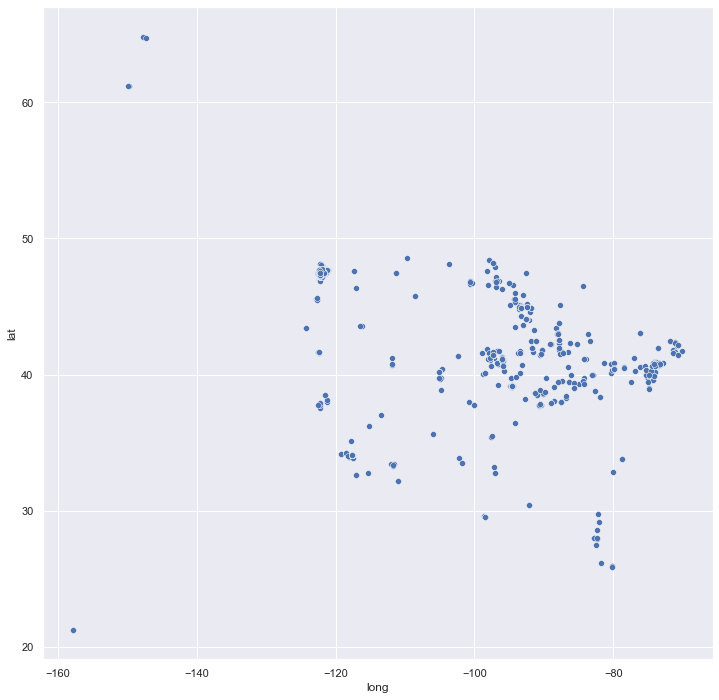

In [62]:
sns.scatterplot(data=df, x='long', y='lat')

<AxesSubplot:>

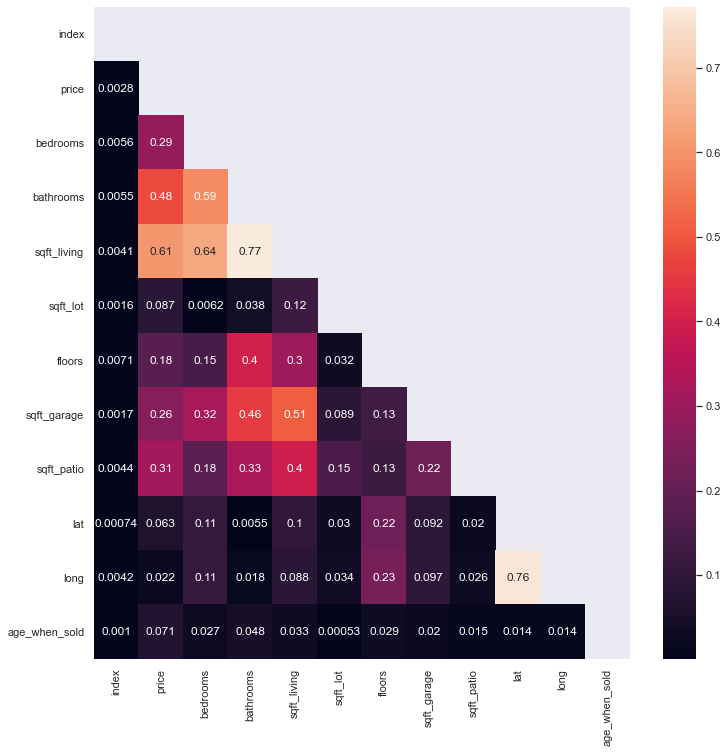

In [16]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df_colwanted.corr()))
sns.heatmap(abs(df_colwanted.corr()), annot=True, mask=mask)

In [17]:
#pairplot with continuous variables
#commented out for run-time

#sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_patio']])

In [18]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

<AxesSubplot:xlabel='price', ylabel='Count'>

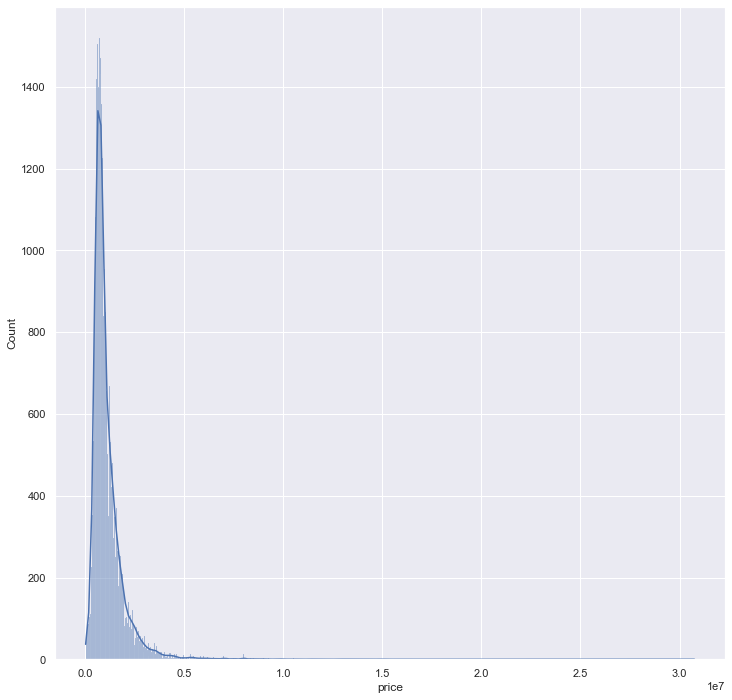

In [19]:
sns.histplot(df_colwanted.price, kde=True)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

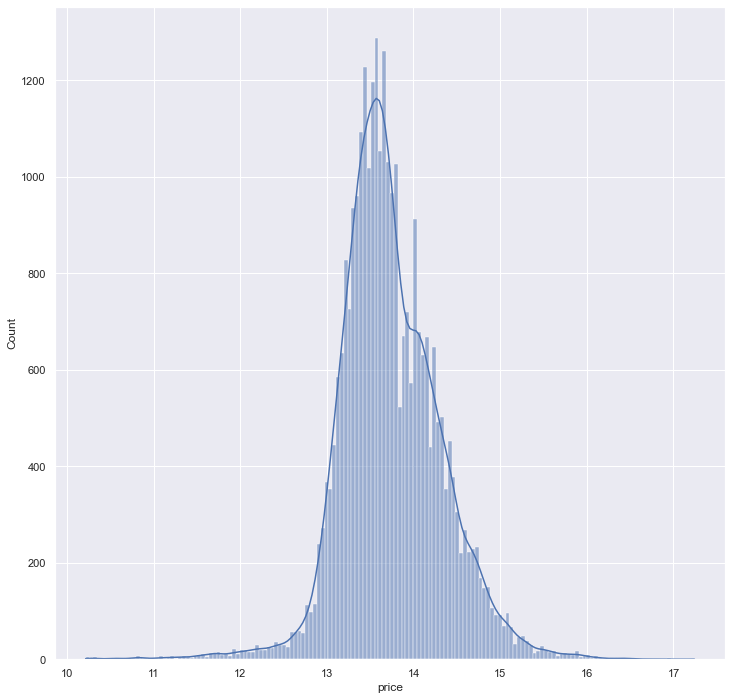

In [20]:
#logscaling target
y_scld = np.log(df_colwanted.price)
sns.histplot(y_scld, kde=True)

### EDA - Baseline OLS Model

In [21]:
y = df.price
X = df[['sqft_living', 'sqft_lot', 'sqft_patio']]

In [22]:
model_base = sm.OLS(y, sm.add_constant(X))
results_base = model_base.fit()
results_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6064.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:38:44   Log-Likelihood:            -4.4832e+05
No. Observations:               30111   AIC:                         8.966e+05
Df Residuals:                   30107   BIC:                         8.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.759e+04   9751.208     -7.956      0.000   -9.67e+04   -5.85e+04
sqft_living   528.9107      4.575    115.605      0.000     519.943     537.878
sqft_lot        0.0464      0.069      0.672      0.502      -0.089       0.182
sqft_patio    312.7786     18.239     17.149      0.000     277.029     348.528
==============================================================================
Omnibus:                    43140.750   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45972551.037
Skew:                           8.106   Prob(JB):                         0.00
Kurtosis:                     193.734   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#need to create markdown and comment on this here!

### EDA - Log Scaled OLS Model

In [24]:
#logscaled target model
model_yscld = sm.OLS(y_scld, sm.add_constant(X))
results_yscld_base = model_yscld.fit()
results_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6462.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:38:44   Log-Likelihood:                -18944.
No. Observations:               30111   AIC:                         3.790e+04
Df Residuals:                   30107   BIC:                         3.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9485      0.006   2070.495      0.000      12.936      12.961
sqft_living     0.0004   2.93e-06    120.629      0.000       0.000       0.000
sqft_lot     6.312e-09   4.43e-08      0.143      0.887   -8.05e-08    9.31e-08
sqft_patio      0.0002   1.17e-05     15.311      0.000       0.000       0.000
==============================================================================
Omnibus:                     5961.142   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50165.584
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       9.158   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#need to create markdown and comment on this here!

### EDA - Log Scaled OLS
(dropping columns to address multicolinearity)

In [26]:
X_new = df[['sqft_living']]

In [27]:
#logscaled target model
newmodel_yscld = sm.OLS(y_scld, sm.add_constant(X_new))
newresults_yscld_base = newmodel_yscld.fit()
newresults_yscld_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:38:44   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      0.000      12.937      12.962
sqft_living     0.0004    2.7e-06    137.836      0.000       0.000       0.000
==============================================================================
Omnibus:                     5867.888   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49915.366
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                       9.150   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [28]:
ohe = OneHotEncoder(drop='first')

In [29]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source
ohe_cols = ['bathrooms', 'bedrooms', 'condition', 'heat_source']

ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())


ohe_all.head()


,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,x0_4.5,x0_5.0,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenate

In [30]:
X_cat = pd.concat([X_new,ohe_all], axis=1)

In [31]:
X_cat.head(2)

,sqft_living,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,x0_4.0,x0_4.5,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2770,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
scaled_oheall_model = sm.OLS(y_scld, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     480.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:38:44   Log-Likelihood:                -18554.
No. Observations:               30111   AIC:                         3.720e+04
Df Residuals:                   30067   BIC:                         3.756e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9466      0.092    141.468      0.000      12.767      13.126
sqft_living              0.0004   4.76e-06     75.558      0.000       0.000       0.000
x0_0.5                   0.7767      0.235      3.312      0.001       0.317       1.236
x0_1.0                   0.5653      0.121      4.658      0.000       0.327       0.803
x0_1.5                   0.5939      0.122      4.876      0.000       0.355       0.833
x0_2.0                   0.6738      0.121      5.546      0.000       0.436       0.912
x0_2.5                   0.6758      0.121      5.564      0.000       0.438       0.914
x0_3.0                   0.7228      0.122      5.944      0.000       0.484       0.961
x0_3.5                   0.8300      0.122      6.814      0.000       0.591       1.069
x0_4.0                   0.8305      0.123      6.767      0.000       0.590       1.071
x0_4.5                   0.9078      0.123      7.363      0.000       0.666       1.149
x0_5.0                   0.8654      0.128      6.785      0.000       0.615       1.115
x0_5.5                   0.7907      0.130      6.080      0.000       0.536       1.046
x0_6.0                   0.8788      0.140      6.291      0.000       0.605       1.153
x0_6.5                   0.9698      0.152      6.371      0.000       0.671       1.268
x0_7.0                   0.6936      0.180      3.844      0.000       0.340       1.047
x0_7.5                   0.5165      0.181      2.846      0.004       0.161       0.872
x0_8.0                   0.2893      0.341      0.848      0.396      -0.379       0.958
x0_8.5                   1.4153      0.471      3.004      0.003       0.492       2.339
x0_9.5                   0.8865      0.465      1.907      0.057      -0.025       1.798
x0_10.0                 -1.8248      0.470     -3.881      0.000      -2.747      -0.903
x0_10.5                 -0.9751      0.467     -2.090      0.037      -1.890      -0.061
x1_1                    -0.4713      0.100     -4.734      0.000      -0.666      -0.276
x1_2                    -0.6016      0.097     -6.178      0.000      -0.793      -0.411
x1_3                    -0.6958      0.097     -7.146      0.000      -0.887      -0.505
x1_4                    -0.7465      0.098     -7.651      0.000      -0.938      -0.555
x1_5                    -0.8099      0.098     -8.265      0.000      -1.002      -0.618
x1_6                    -0.8758      0.100     -8.778      0.000      -1.071      -0.680
x1_7                    -0.9482      0.110     -8.605      0.000      -1.164      -0.732
x1_8                    -0.9721      0.123     -7.932      0.000      -1.212      -0.732
x1_9                    -0.9896      0.156     -6.338      0.000      -1.296      -0.684
x1_10                   -1.0384      0.284     -3.658    